## Etape 1 : Pretraitement 
- elimination of th first 7 columns :
    - car ces colonnes ne sont pas pertinentes pour identifier des transaction ou des items, car elles presentent des valeurs continues et non des entites ou des categories 

In [1]:
import pandas as pd
from itertools import combinations
from collections import defaultdict

In [2]:
# Charger le dataset
df = pd.read_csv("DatasetExos.csv", sep=";")

# 1. Éliminer les 7 premières colonnes
df = df.drop(df.columns[:7], axis=1)


In [3]:
print (df)

     ID  Label Category   Set
0     B  bench    heavy  30.0
1     B  bench    heavy  30.0
2     B  bench    heavy  30.0
3     B  bench    heavy  30.0
4     B  bench    heavy  30.0
...  ..    ...      ...   ...
9004  E    row   medium  40.0
9005  E    row   medium  40.0
9006  E    row   medium  40.0
9007  E    row   medium  40.0
9008  E    row   medium  40.0

[9009 rows x 4 columns]


Les transactions sont générées sous forme de tuples (Label, Category, Set) en regroupant les colonnes correspondantes. Chaque transaction représente une combinaison unique des items 

## Etape 2 : Identifier les transactions et les items
Une Transaction correspond a une entite unique qui regroupe plusieurs items.

In [ ]:
# 2. Prétraiter les données : créer une transaction par ID, catégorie, label et set
""" Cette ligne crée un DataFrame ou chaque ligne est une 
combinaison unique de ID, Label, Category, et Set, accompagnée 
du nombre d'occurrences de cette c`ombinaison. """

transactions = df.groupby(['ID', 'Label', 'Category', 'Set']).size().reset_index(name='count')
print (transactions)
print("--------------------------------------------------------")
dataset = transactions.to_csv("dataset_exos_2.csv")
transactions = transactions[['Label', 'Category', 'Set']].apply(lambda x: tuple(x), axis=1).tolist()
print (transactions)


   ID  Label  Category   Set  count
0   A  bench     heavy   5.0     72
1   A  bench     heavy  74.0     62
2   A  bench     heavy  86.0     83
3   A  bench     heavy  88.0     62
4   A   dead     heavy  48.0     81
.. ..    ...       ...   ...    ...
91  E    row    medium  53.0    106
92  E    row    medium  63.0    106
93  E  squat     heavy  15.0     98
94  E  squat     heavy  73.0    103
95  Z   rest  standing  19.0      1

[96 rows x 5 columns]
--------------------------------------------------------
[('bench', 'heavy', 5.0), ('bench', 'heavy', 74.0), ('bench', 'heavy', 86.0), ('bench', 'heavy', 88.0), ('dead', 'heavy', 48.0), ('dead', 'medium', 11.0), ('dead', 'medium', 55.0), ('dead', 'medium', 75.0), ('ohp', 'heavy', 1.0), ('ohp', 'heavy', 10.0), ('ohp', 'heavy', 24.0), ('ohp', 'heavy', 38.0), ('ohp', 'heavy', 39.0), ('ohp', 'heavy', 58.0), ('ohp', 'heavy', 93.0), ('ohp', 'medium', 56.0), ('ohp', 'medium', 61.0), ('ohp', 'medium', 77.0), ('rest', 'sitting', 60.0), ('rest', 'si

## Etape 3 : Compter les transactions et les items

### Nombre de transactions
nombre de combis uniques de ID et Set

### Nombre d'items 
le nombre de combis uniques de label/Category

In [5]:
# 3. Nombre de transactions et d'items
number_of_transactions = len(transactions)  # Taille de la liste des transactions
items = set([item for transaction in transactions for item in transaction])  # Ensemble des items uniques
number_of_items = len(items)  # Taille de l'ensemble des items

# Affichage des résultats
print(f"Nombre de transactions : {number_of_transactions}")
print(f"Nombre d'items : {number_of_items}")


Nombre de transactions : 96
Nombre d'items : 104


## Etape 4 : Reformater le dataset en format transactionnel

In [6]:
# Créer un DataFrame avec le format "Transaction" et "Items"
df_transactional = pd.DataFrame({
    'Transaction': range(len(transactions)),  # Génère des identifiants uniques pour chaque transaction
    'Items': [set(transaction) for transaction in transactions]  # Transforme chaque transaction en set
})

# Afficher un aperçu du dataset reformatté
print("\nDataset reformatté en format transactionnel :")
print(df_transactional.head())

# Sauvegarder le dataset en format CSV
df_transactional.to_csv("DatasetExos_2.csv", index=False)
print("\nLe dataset transactionnel 'DatasetExos_Transaction.csv' a été sauvegardé.")



Dataset reformatté en format transactionnel :
   Transaction                 Items
0            0   {heavy, 5.0, bench}
1            1  {74.0, heavy, bench}
2            2  {86.0, heavy, bench}
3            3  {88.0, heavy, bench}
4            4   {48.0, heavy, dead}

Le dataset transactionnel 'DatasetExos_Transaction.csv' a été sauvegardé.


### Duplications

#### Doit-on conserver les répétitions ?
- Dans le cadre d'extraction de Frequent Itemsets, les répétitions ne sont pas nécessaires.
Les itemsets sont des ensembles, ce qui signifie que :

- L'ordre n'importe pas (ex. {bench_heavy, squat_medium} est le même que {squat_medium, bench_heavy}).
Les doublons ne sont pas comptés (ex. {bench_heavy, bench_heavy} devient {bench_heavy}).

In [7]:
from collections import Counter

item_counts = Counter([item for transaction in transactions for item in transaction])
print("\nItems uniques et leur fréquence :")
for item, count in item_counts.items():
    print(f"Item: {item}, Fréquence: {count}")



Items uniques et leur fréquence :
Item: bench, Fréquence: 19
Item: heavy, Fréquence: 49
Item: 5.0, Fréquence: 1
Item: 74.0, Fréquence: 1
Item: 86.0, Fréquence: 1
Item: 88.0, Fréquence: 1
Item: dead, Fréquence: 11
Item: 48.0, Fréquence: 1
Item: medium, Fréquence: 40
Item: 11.0, Fréquence: 1
Item: 55.0, Fréquence: 1
Item: 75.0, Fréquence: 1
Item: ohp, Fréquence: 21
Item: 1.0, Fréquence: 2
Item: 10.0, Fréquence: 1
Item: 24.0, Fréquence: 1
Item: 38.0, Fréquence: 1
Item: 39.0, Fréquence: 1
Item: 58.0, Fréquence: 1
Item: 93.0, Fréquence: 1
Item: 56.0, Fréquence: 1
Item: 61.0, Fréquence: 1
Item: 77.0, Fréquence: 1
Item: rest, Fréquence: 7
Item: sitting, Fréquence: 3
Item: 60.0, Fréquence: 1
Item: 82.0, Fréquence: 1
Item: standing, Fréquence: 4
Item: 23.0, Fréquence: 1
Item: 51.0, Fréquence: 1
Item: row, Fréquence: 22
Item: 20.0, Fréquence: 1
Item: 66.0, Fréquence: 1
Item: squat, Fréquence: 15
Item: 18.0, Fréquence: 1
Item: 22.0, Fréquence: 1
Item: 45.0, Fréquence: 1
Item: 9.0, Fréquence: 1
I

## APRIORI

### Les fonctions

- Support(Itemset)= 
Nombre de transactions contenant l’itemset /Nombre total de transactions

* Fonction pour générer 𝐶𝑘:

In [8]:
# Fonction pour générer les candidats k-itemsets
def generate_k_itemsets(Lk, k):
    # Générer tous les candidats k-itemsets parmi les itemsets fréquents
    candidates = list(combinations(Lk, k))
    return candidates

* Fonction pour calculer le support de 𝐶𝑘:

Vérifie pour chaque k-itemset combien de transactions contiennent tous les items.

In [9]:
# Fonction pour calculer le support d'un itemset
def calculate_support(k_itemset, transactions):
    count = sum(1 for t in transactions if set(k_itemset).issubset(set(t)))
    return count / len(transactions)

* Fonction pour extraire 𝐿𝑘:  
    Filtre les k-itemsets fréquents selon supp min.


In [10]:
# Fonction pour générer les itemsets fréquents Lk
def generate_frequent_k_itemsets(Ck, transactions, supp_min):
    Lk = [itemset for itemset in Ck if calculate_support(itemset, transactions) >= supp_min]
    return Lk

### ++ 

In [11]:
def display_candidates(Ck, transactions):
    print(f"\nCandidats (C{len(Ck[0])}-itemsets) :")
    for itemset in Ck:
        support = calculate_support(itemset, transactions)
        print(f"Itemset: {itemset}, Support: {support:.2f}")


In [12]:
def display_frequent_itemsets(Lk, transactions):
    print(f"\nItemsets fréquents (L{len(Lk[0])}-itemsets) :")
    for itemset in Lk:
        support = calculate_support(itemset, transactions)
        print(f"Itemset: {itemset}, Support: {support:.2f}")


## Confidence

* 1- Generer toutes les regles d'association pour un itemset frequent

In [ ]:
# Fonction pour générer toutes les règles d'association à partir d'un itemset Lk
def generate_association_rules(Lk):
    rules = []
    for itemset in Lk:
        for k in range(1, len(itemset)):
            antecedents = combinations(itemset, k)
            for antecedent in antecedents:
                consequent = tuple(sorted(set(itemset) - set(antecedent)))
                if consequent:
                    rules.append((set(antecedent), set(consequent)))
    return rules

* 2- Calculer la confiance d'une regle d'association

In [14]:
# Fonction pour calculer la confiance d'une règle d'association
def calculate_confidence(rule, transactions):
    antecedent, consequent = rule
    support_A_union_B = calculate_support(list(antecedent) + list(consequent), transactions)
    support_A = calculate_support(list(antecedent), transactions)
    return support_A_union_B / support_A if support_A != 0 else 0

* Utilisation des fonctions

In [15]:
# Paramètres
supp_min = 0.1  # Support minimum
conf_min = 0.1  # Confiance minimum

# Étape 1 : Générer C1 (candidats 1-itemset)
items = set([item for transaction in transactions for item in transaction])  # Tous les items uniques
C1 = list(items)

In [16]:
# Étape 2 : Calculer les L1 (items fréquents 1-itemset)
L1 = [item for item in C1 if calculate_support([item], transactions) >= supp_min]
print(f"Frequent 1-itemsets (L1): {L1}")
print("--------------------------------------------------------------------------------------")
# Affichage du support pour chaque L1
for item in L1:
    print(f"Support({item}): {calculate_support([item], transactions)}")

Frequent 1-itemsets (L1): ['bench', 'dead', 'ohp', 'medium', 'row', 'heavy', 'squat']
--------------------------------------------------------------------------------------
Support(bench): 0.19791666666666666
Support(dead): 0.11458333333333333
Support(ohp): 0.21875
Support(medium): 0.4166666666666667
Support(row): 0.22916666666666666
Support(heavy): 0.5104166666666666
Support(squat): 0.15625


In [17]:
# Étape 3 : Générer C2 (candidats 2-itemsets)
C2 = generate_k_itemsets(L1, 2)

# Étape 4 : Calculer les L2 (itemsets fréquents 2-itemset)
L2 = generate_frequent_k_itemsets(C2, transactions, supp_min)
print(f"\nFrequent 2-itemsets (L2): {L2}")
print("--------------------------------------------------------------------------------------")

# Affichage du support pour chaque L2
for itemset in L2:
    print(f"Support({itemset}): {calculate_support(itemset, transactions)}")


Frequent 2-itemsets (L2): [('bench', 'heavy'), ('ohp', 'heavy'), ('medium', 'row'), ('row', 'heavy')]
--------------------------------------------------------------------------------------
Support(('bench', 'heavy')): 0.13541666666666666
Support(('ohp', 'heavy')): 0.15625
Support(('medium', 'row')): 0.125
Support(('row', 'heavy')): 0.10416666666666667


In [18]:
display_candidates(C2, transactions)
display_frequent_itemsets(L2, transactions)


Candidats (C2-itemsets) :
Itemset: ('bench', 'dead'), Support: 0.00
Itemset: ('bench', 'ohp'), Support: 0.00
Itemset: ('bench', 'medium'), Support: 0.06
Itemset: ('bench', 'row'), Support: 0.00
Itemset: ('bench', 'heavy'), Support: 0.14
Itemset: ('bench', 'squat'), Support: 0.00
Itemset: ('dead', 'ohp'), Support: 0.00
Itemset: ('dead', 'medium'), Support: 0.09
Itemset: ('dead', 'row'), Support: 0.00
Itemset: ('dead', 'heavy'), Support: 0.02
Itemset: ('dead', 'squat'), Support: 0.00
Itemset: ('ohp', 'medium'), Support: 0.06
Itemset: ('ohp', 'row'), Support: 0.00
Itemset: ('ohp', 'heavy'), Support: 0.16
Itemset: ('ohp', 'squat'), Support: 0.00
Itemset: ('medium', 'row'), Support: 0.12
Itemset: ('medium', 'heavy'), Support: 0.00
Itemset: ('medium', 'squat'), Support: 0.06
Itemset: ('row', 'heavy'), Support: 0.10
Itemset: ('row', 'squat'), Support: 0.00
Itemset: ('heavy', 'squat'), Support: 0.09

Itemsets fréquents (L2-itemsets) :
Itemset: ('bench', 'heavy'), Support: 0.14
Itemset: ('ohp'

In [19]:
# Étape 5 : Générer C3 (candidats 3-itemsets)
C3 = generate_k_itemsets(L2, 3)

# Étape 6 : Calculer les L3 (itemsets fréquents 3-itemset)
L3 = generate_frequent_k_itemsets(C3, transactions, supp_min)
print(f"\nFrequent 3-itemsets (L3): {L3}")

# Affichage du support pour chaque L3
for itemset in L3:
    print(f"Support({itemset}): {calculate_support(itemset, transactions)}")


Frequent 3-itemsets (L3): []


In [20]:
import matplotlib.pyplot as plt

def plot_itemset_supports(Lk, transactions):
    itemsets = [' & '.join(itemset) for itemset in Lk]
    supports = [calculate_support(itemset, transactions) for itemset in Lk]
    
    plt.barh(itemsets, supports, color='skyblue')
    plt.xlabel('Support')
    plt.ylabel('Itemsets')
    plt.title(f'Support des {len(Lk[0])}-itemsets fréquents')
    plt.show()


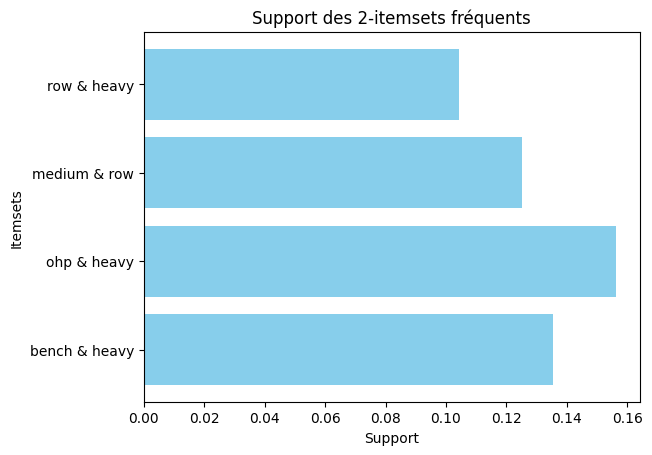

In [21]:
plot_itemset_supports(L2, transactions)

In [22]:
# Étape 7 : Générer les règles d'association à partir des Lk fréquents
rules_L2 = generate_association_rules(L2)

# Calculer la confiance pour chaque règle
for rule in rules_L2:
    conf = calculate_confidence(rule, transactions)
    if conf >= conf_min:
        print("-----------------------------------------------")
        print(f"\nRègle d'association : {rule[0]} ⇒ {rule[1]}")
        print(f"Confiance: {conf}")


-----------------------------------------------

Règle d'association : {'bench'} ⇒ {'heavy'}
Confiance: 0.6842105263157895
-----------------------------------------------

Règle d'association : {'heavy'} ⇒ {'bench'}
Confiance: 0.2653061224489796
-----------------------------------------------

Règle d'association : {'ohp'} ⇒ {'heavy'}
Confiance: 0.7142857142857143
-----------------------------------------------

Règle d'association : {'heavy'} ⇒ {'ohp'}
Confiance: 0.30612244897959184
-----------------------------------------------

Règle d'association : {'medium'} ⇒ {'row'}
Confiance: 0.3
-----------------------------------------------

Règle d'association : {'row'} ⇒ {'medium'}
Confiance: 0.5454545454545455
-----------------------------------------------

Règle d'association : {'row'} ⇒ {'heavy'}
Confiance: 0.4545454545454546
-----------------------------------------------

Règle d'association : {'heavy'} ⇒ {'row'}
Confiance: 0.20408163265306126


In [23]:
import pandas as pd

def display_rules(rules, transactions, conf_min):
    data = []
    for rule in rules:
        antecedent, consequent = rule
        confidence = calculate_confidence(rule, transactions)
        if confidence >= conf_min:
            support = calculate_support(list(antecedent) + list(consequent), transactions)
            data.append({
                'Antécédent': ', '.join(antecedent),
                'Conséquent': ', '.join(consequent),
                'Support': support,
                'Confiance': confidence
            })
    
    df_rules = pd.DataFrame(data)
    print("\nRègles d'association (filtrées par confiance) :")
    print(df_rules)

display_rules(rules_L2, transactions, conf_min)



Règles d'association (filtrées par confiance) :
  Antécédent Conséquent   Support  Confiance
0      bench      heavy  0.135417   0.684211
1      heavy      bench  0.135417   0.265306
2        ohp      heavy  0.156250   0.714286
3      heavy        ohp  0.156250   0.306122
4     medium        row  0.125000   0.300000
5        row     medium  0.125000   0.545455
6        row      heavy  0.104167   0.454545
7      heavy        row  0.104167   0.204082


In [24]:
print("\nRésumé final :")
print(f"Nombre total de transactions : {len(transactions)}")
print(f"Nombre de candidats (C1) : {len(C1)}")
print(f"Nombre d'itemsets fréquents (L1) : {len(L1)}")
print(f"Nombre de règles générées : {len(rules_L2)}")



Résumé final :
Nombre total de transactions : 96
Nombre de candidats (C1) : 104
Nombre d'itemsets fréquents (L1) : 7
Nombre de règles générées : 8


## Confirmer les resultats avec Mlxtend

In [28]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Charger le dataset
df = pd.read_csv("DatasetExos.csv", sep=";")

# 1. Éliminer les 7 premières colonnes
df = df.drop(df.columns[:7], axis=1)

# 2. Prétraiter les données : créer une transaction par ID, catégorie, label et set
transactions = df.groupby(['ID', 'Label', 'Category', 'Set']).size().reset_index(name='count')
transactions = transactions[['Label', 'Category', 'Set']].apply(lambda x: tuple(x), axis=1).tolist()

# Convertir chaque élément des transactions en chaîne de caractères
transactions = [[str(item) for item in transaction] for transaction in transactions]

# Affichage des transactions après conversion
print("Exemple de transactions après conversion en chaînes :")
print(transactions[:5])

# 3. Convertir les transactions en une forme compatible avec mlxtend (TransactionEncoder)
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convertir en DataFrame
df_bin = pd.DataFrame(te_ary, columns=te.columns_)

# 4. Appliquer l'algorithme Apriori pour générer les itemsets fréquents
min_support = 0.1
frequent_itemsets = apriori(df_bin, min_support=min_support, use_colnames=True)

# Affichage des itemsets fréquents
print("\nItemsets fréquents:")
print(frequent_itemsets)

# 5. Générer les règles d'association à partir des itemsets fréquents
min_confidence = 0.1
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Affichage des règles d'association
print("\nRègles d'association:")
for index, row in rules.iterrows():
    print(f"Règle: {set(row['antecedents'])} => {set(row['consequents'])}")
    print(f"Confiance: {row['confidence']}")
    print(f"Support: {row['support']}")
    #print(f"Lift: {row['lift']}")
    print("-" * 40)


Exemple de transactions après conversion en chaînes :
[['bench', 'heavy', '5.0'], ['bench', 'heavy', '74.0'], ['bench', 'heavy', '86.0'], ['bench', 'heavy', '88.0'], ['dead', 'heavy', '48.0']]

Itemsets fréquents:
     support        itemsets
0   0.197917         (bench)
1   0.114583          (dead)
2   0.510417         (heavy)
3   0.416667        (medium)
4   0.218750           (ohp)
5   0.229167           (row)
6   0.156250         (squat)
7   0.135417  (heavy, bench)
8   0.156250    (heavy, ohp)
9   0.104167    (row, heavy)
10  0.125000   (row, medium)

Règles d'association:
Règle: {'heavy'} => {'bench'}
Confiance: 0.2653061224489796
Support: 0.13541666666666666
----------------------------------------
Règle: {'bench'} => {'heavy'}
Confiance: 0.6842105263157895
Support: 0.13541666666666666
----------------------------------------
Règle: {'heavy'} => {'ohp'}
Confiance: 0.30612244897959184
Support: 0.15625
----------------------------------------
Règle: {'ohp'} => {'heavy'}
Confiance: